Lab | Data cleaning and wrangling
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
Create a copy of the dataframe for the data wrangling.
Normalize the continuous variables. You can use any one method you want.
Encode the categorical variables
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):



Exploring data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.shape
customer_df.head(5)

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.columns=['Customer_id', 'State', 'Customer_lifetime_value', 'Response', 'Coverage',
       'Education', 'Effective_date', 'Employment_status', 'Gender',
       'Income', 'Location_code', 'Marital_status', 'Monthly_premium_auto',
       'Months_since_last_claim', 'Months_since_policy_nception',
       'Number_of_open_complaints', 'Number_of_policies', 'Policy_type',
       'Policy', 'Renew_offer_type', 'Sales_channel', 'Total_claim_amount',
       'Vehicle_class', 'Vehicle_size']

In [5]:
# change effective date in to month only.
customer_df['Effective_date']= pd.to_datetime(customer_df['Effective_date'])


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer_id                   9134 non-null   object        
 1   State                         9134 non-null   object        
 2   Customer_lifetime_value       9134 non-null   float64       
 3   Response                      9134 non-null   object        
 4   Coverage                      9134 non-null   object        
 5   Education                     9134 non-null   object        
 6   Effective_date                9134 non-null   datetime64[ns]
 7   Employment_status             9134 non-null   object        
 8   Gender                        9134 non-null   object        
 9   Income                        9134 non-null   int64         
 10  Location_code                 9134 non-null   object        
 11  Marital_status                

In [7]:
customer_df.nunique()#this shows howmany distinct values in each column.The value above 1000 we are considered as continuous

Customer_id                     9134
State                              5
Customer_lifetime_value         8041
Response                           2
Coverage                           3
Education                          5
Effective_date                    59
Employment_status                  5
Gender                             2
Income                          5694
Location_code                      3
Marital_status                     3
Monthly_premium_auto             202
Months_since_last_claim           36
Months_since_policy_nception     100
Number_of_open_complaints          6
Number_of_policies                 9
Policy_type                        3
Policy                             9
Renew_offer_type                   4
Sales_channel                      4
Total_claim_amount              5106
Vehicle_class                      6
Vehicle_size                       3
dtype: int64

In [8]:
catagorical = customer_df.select_dtypes(exclude=[np.number])
catagorical.head(5)

,Customer_id,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
catagorical = catagorical.drop(['Customer_id'], axis=1)
catagorical.head(5)

,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
# extract continous and discrete variables
Continuous = customer_df[['Customer_lifetime_value','Income','Total_claim_amount']].astype(int)
Continuous.head(5)
discrete = customer_df.drop(['Customer_id','Customer_lifetime_value','Income','Total_claim_amount'], axis=1)
discrete.head(5)

,Customer_lifetime_value,Income,Total_claim_amount
0,2763,56274,384
1,6979,0,1131
2,12887,48767,566
3,7645,0,529
4,2813,43836,138


,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [11]:
Continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_lifetime_value  9134 non-null   int64
 1   Income                   9134 non-null   int64
 2   Total_claim_amount       9134 non-null   int64
dtypes: int64(3)
memory usage: 214.2 KB


In [12]:
discrete = discrete.select_dtypes(include=['int64'])
discrete

,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [13]:
X = pd.concat([Continuous, discrete], axis=1)
X 

,Customer_lifetime_value,Income,Total_claim_amount,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
0,2763,56274,384,69,32,5,0,1
1,6979,0,1131,94,13,42,0,8
2,12887,48767,566,108,18,38,0,2
3,7645,0,529,106,18,65,0,7
4,2813,43836,138,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,23405,71941,198,73,18,89,0,2
9130,3096,21604,379,79,14,28,0,1
9131,8163,0,790,85,9,37,3,2
9132,7524,21941,691,96,34,3,0,3


In [14]:
X .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Customer_lifetime_value       9134 non-null   int64
 1   Income                        9134 non-null   int64
 2   Total_claim_amount            9134 non-null   int64
 3   Monthly_premium_auto          9134 non-null   int64
 4   Months_since_last_claim       9134 non-null   int64
 5   Months_since_policy_nception  9134 non-null   int64
 6   Number_of_open_complaints     9134 non-null   int64
 7   Number_of_policies            9134 non-null   int64
dtypes: int64(8)
memory usage: 571.0 KB


In [15]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Customer_lifetime_value,Income,Total_claim_amount,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
0,-0.762880,0.612827,-0.170818,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149250,-1.239617,2.400607,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710647,0.365710,0.455687,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052315,-1.239617,0.328321,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755603,0.203390,-1.017633,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


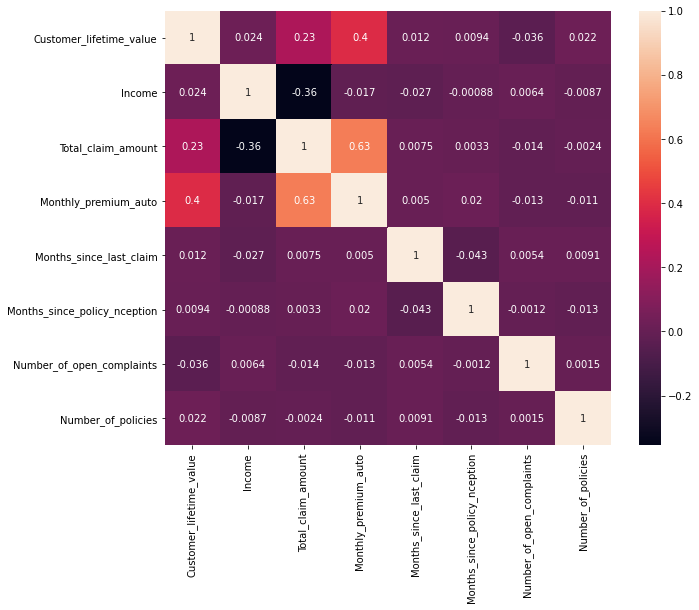

,Customer_lifetime_value,Income,Total_claim_amount,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
Customer_lifetime_value,1.000000,0.024365,0.226454,0.396262,0.011516,0.009419,-0.036342,0.021956
Income,0.024365,1.000000,-0.355249,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
Total_claim_amount,0.226454,-0.355249,1.000000,0.632012,0.007541,0.003345,-0.014253,-0.002379
Monthly_premium_auto,0.396262,-0.016665,0.632012,1.000000,0.005026,0.020257,-0.013122,-0.011233
Months_since_last_claim,0.011516,-0.026715,0.007541,0.005026,1.000000,-0.042959,0.005354,0.009136
Months_since_policy_nception,0.009419,-0.000875,0.003345,0.020257,-0.042959,1.000000,-0.001158,-0.013333
Number_of_open_complaints,-0.036342,0.006408,-0.014253,-0.013122,0.005354,-0.001158,1.000000,0.001498
Number_of_policies,0.021956,-0.008656,-0.002379,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [16]:
corr_matrix=X_scaled.corr(method='pearson')  # there is no variable has highly correlated with each other
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
corr_matrix

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_lifetime_value'>

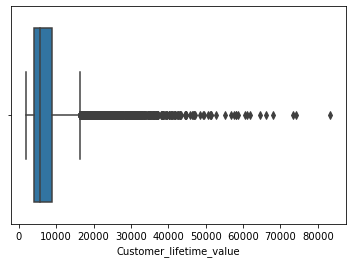

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

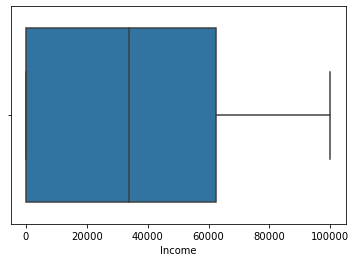

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_claim_amount'>

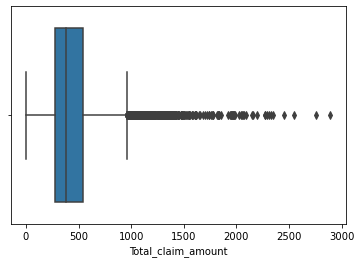

In [17]:
for i in range(len(Continuous.columns)):
    sns.boxplot(Continuous.iloc[:,i])
    plt.show()

def log_transfom_clean(x):
    if np.isfinite(x) and x>=0:
        return np.log(x)
    else:
        return np.nan

In [18]:
# variable shows outliers and it hasn't normally distributed so normalize by iqr.
iqr = np.percentile(Continuous['Customer_lifetime_value'],75) - np.percentile(Continuous['Customer_lifetime_value'],25)
upper_limit = np.percentile(Continuous['Customer_lifetime_value'],75) + 1.5*iqr
Cont1 = Continuous[Continuous['Customer_lifetime_value'] < upper_limit]

iqr = np.percentile(Continuous['Total_claim_amount'],75) - np.percentile(Continuous['Total_claim_amount'],25)
upper_limit = np.percentile(Continuous['Total_claim_amount'],75) + 1.5*iqr
Cont2 = Continuous[Continuous['Total_claim_amount'] < upper_limit]

iqr = np.percentile(Continuous['Income'],75) - np.percentile(Continuous['Income'],25)
upper_limit = np.percentile(Continuous['Income'],75) + 1.5*iqr
Cont3 = Continuous[Continuous['Income'] < upper_limit]



In [45]:
Continuous1 = pd.concat((Cont1,Cont2,Cont3),axis=1)
Continuous1

,Customer_lifetime_value,Income,Total_claim_amount,Customer_lifetime_value,Income,Total_claim_amount,Customer_lifetime_value,Income,Total_claim_amount
0,2763.0,56274.0,384.0,2763.0,56274.0,384.0,2763,56274,384
1,6979.0,0.0,1131.0,NaN,NaN,NaN,6979,0,1131
2,12887.0,48767.0,566.0,12887.0,48767.0,566.0,12887,48767,566
3,7645.0,0.0,529.0,7645.0,0.0,529.0,7645,0,529
4,2813.0,43836.0,138.0,2813.0,43836.0,138.0,2813,43836,138
...,...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,23405.0,71941.0,198.0,23405,71941,198
9130,3096.0,21604.0,379.0,3096.0,21604.0,379.0,3096,21604,379
9131,8163.0,0.0,790.0,8163.0,0.0,790.0,8163,0,790
9132,7524.0,21941.0,691.0,7524.0,21941.0,691.0,7524,21941,691


Continuous['Customer_lifetime_value'] = pd.Series(Continuous['Customer_lifetime_value'].apply(log_transfom_clean))
Continuous['Total_claim_amount'] = pd.Series(Continuous['Total_claim_amount'].apply(log_transfom_clean))


/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_lifetime_value'>

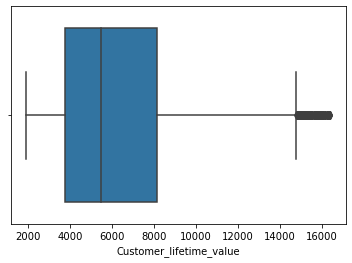

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

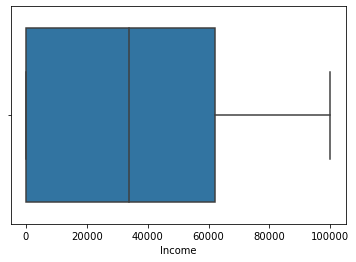

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_claim_amount'>

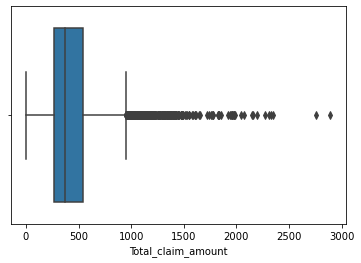

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_lifetime_value'>

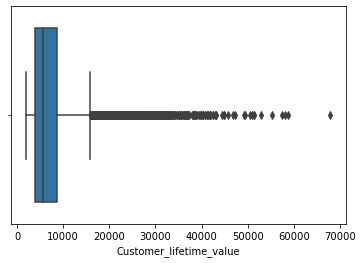

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

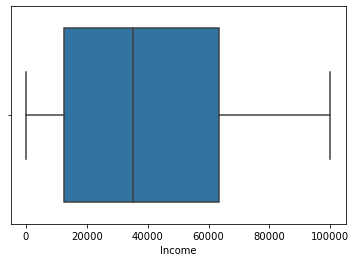

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_claim_amount'>

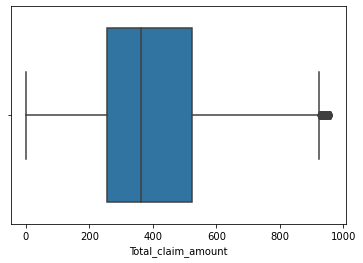

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_lifetime_value'>

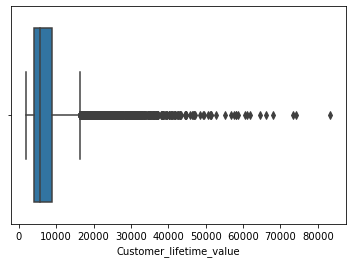

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

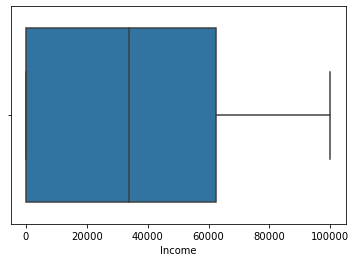

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_claim_amount'>

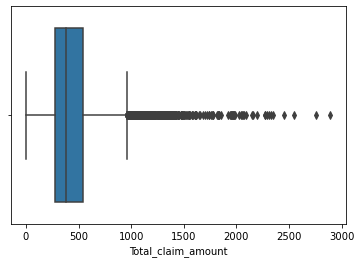

In [20]:
for i in range(len(Continuous1.columns)):
    sns.boxplot(Continuous1.iloc[:,i])
    plt.show()

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_premium_auto', ylabel='count'>

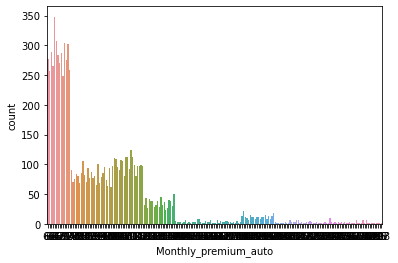

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months_since_last_claim', ylabel='count'>

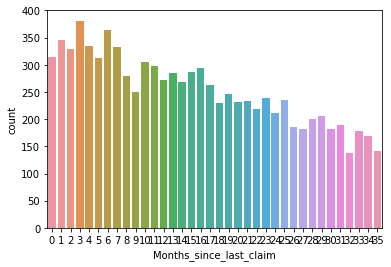

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months_since_policy_nception', ylabel='count'>

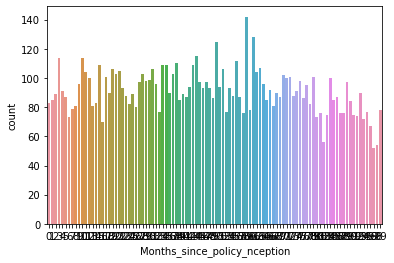

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_open_complaints', ylabel='count'>

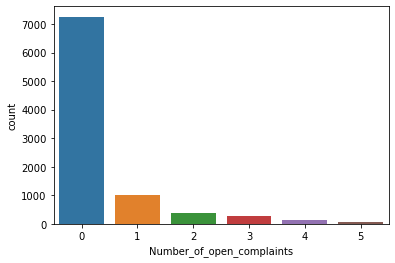

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_policies', ylabel='count'>

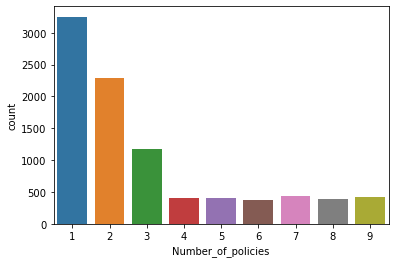

In [21]:
for i in range(len(discrete.columns)):
        sns.countplot(discrete.iloc[:,i])
        plt.show()

In [22]:
Continuous1.isnull().sum()
discrete.isnull().sum()
catagorical.isnull().sum()

Customer_lifetime_value    817
Income                     817
Total_claim_amount         817
Customer_lifetime_value    459
Income                     459
Total_claim_amount         459
Customer_lifetime_value      0
Income                       0
Total_claim_amount           0
dtype: int64

Monthly_premium_auto            0
Months_since_last_claim         0
Months_since_policy_nception    0
Number_of_open_complaints       0
Number_of_policies              0
dtype: int64

State                0
Response             0
Coverage             0
Education            0
Effective_date       0
Employment_status    0
Gender               0
Location_code        0
Marital_status       0
Policy_type          0
Policy               0
Renew_offer_type     0
Sales_channel        0
Vehicle_class        0
Vehicle_size         0
dtype: int64

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

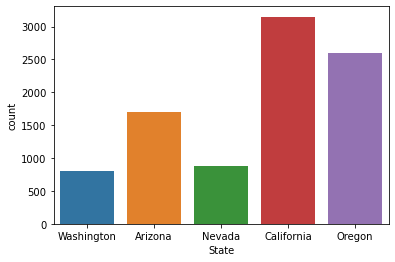

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

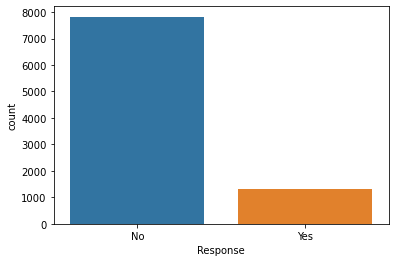

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Coverage', ylabel='count'>

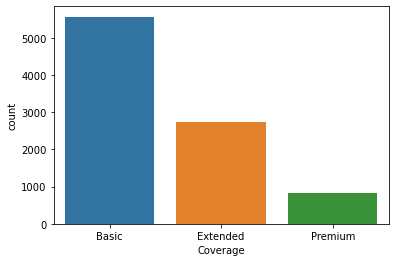

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

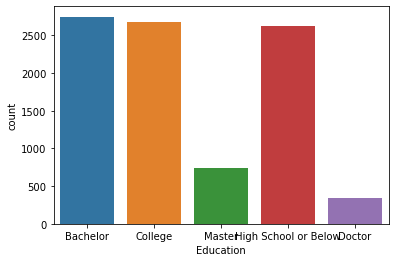

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Effective_date', ylabel='count'>

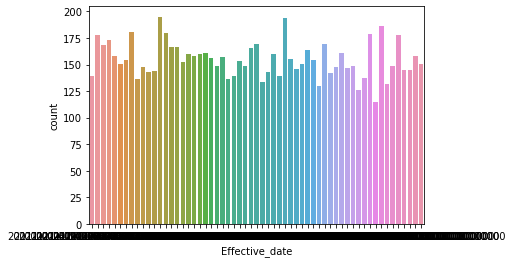

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employment_status', ylabel='count'>

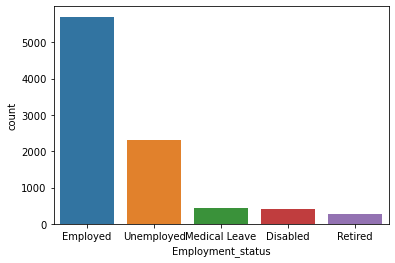

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

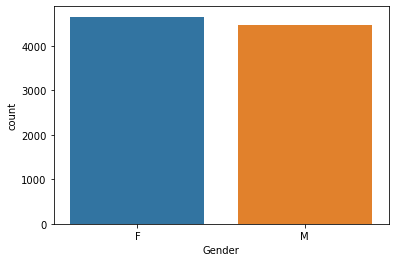

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location_code', ylabel='count'>

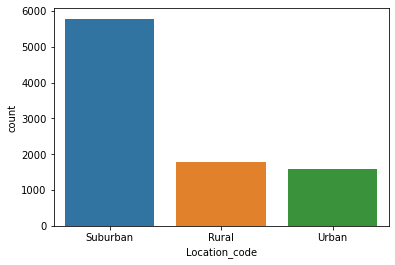

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

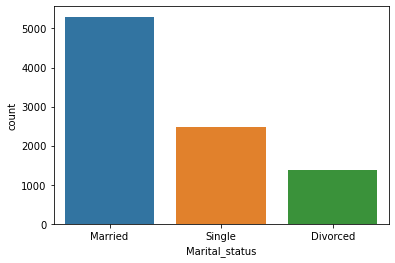

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy_type', ylabel='count'>

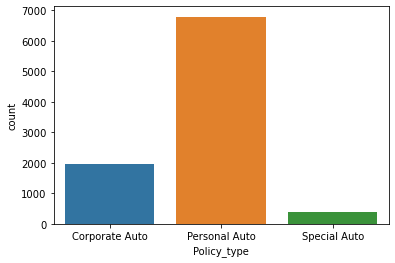

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy', ylabel='count'>

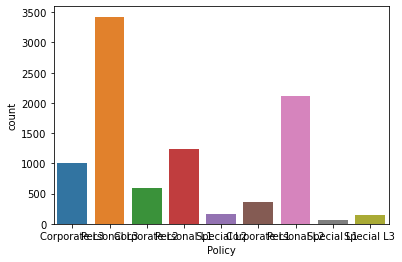

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Renew_offer_type', ylabel='count'>

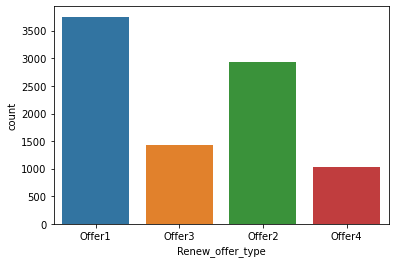

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_channel', ylabel='count'>

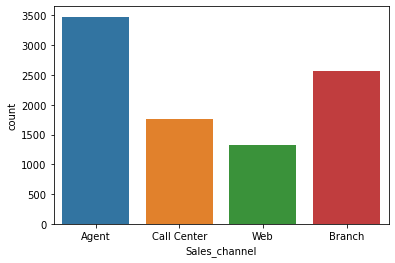

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_class', ylabel='count'>

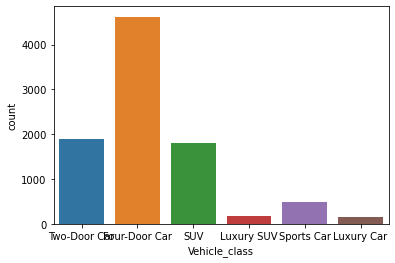

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_size', ylabel='count'>

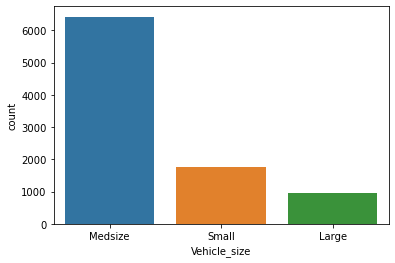

In [23]:
for i in range(len(catagorical.columns)):
        sns.countplot(catagorical.iloc[:,i])
        plt.show()

In [24]:
catagorical

,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [25]:
# trying to find what are the variable has dependent with other  variables.
# using chi-squre test
#Ho: variables are independent
#H1:variables are dependent
col1=[]
col2=[]
P_value=[]

for i in range(len(catagorical.columns)-1):
    for e in range(len(catagorical.columns)):
        cross = pd.crosstab(catagorical[catagorical.columns[i]], catagorical[catagorical.columns[e]], margins = False)
        P =st.chi2_contingency(cross)
        print(catagorical.columns[i], 'Vs', catagorical.columns[e],'P-Value=',P[1])
        col1.append(catagorical.columns[i])
        col2.append(catagorical.columns[e])
        P_value.append(P[1])

State Vs State P-Value= 0.0
State Vs Response P-Value= 0.9792071512335693
State Vs Coverage P-Value= 0.917159533694559
State Vs Education P-Value= 0.41175093304338845
State Vs Effective_date P-Value= 0.5632992512370463
State Vs Employment_status P-Value= 0.9967283699758681
State Vs Gender P-Value= 0.8788800177920362
State Vs Location_code P-Value= 0.9960201469631593
State Vs Marital_status P-Value= 0.3071184165859179
State Vs Policy_type P-Value= 0.02759771453682972
State Vs Policy P-Value= 0.0002717396766205771
State Vs Renew_offer_type P-Value= 0.9981046105700003
State Vs Sales_channel P-Value= 0.7518231475699538
State Vs Vehicle_class P-Value= 0.47283732040742543
State Vs Vehicle_size P-Value= 0.28300211552440135
Response Vs State P-Value= 0.9792071512335693
Response Vs Response P-Value= 0.0
Response Vs Coverage P-Value= 0.969826323902391
Response Vs Education P-Value= 0.026815866387951
Response Vs Effective_date P-Value= 3.489635955995335e-41
Response Vs Employment_status P-Value= 

In [26]:
col1=pd.DataFrame(col1)
col2=pd.DataFrame(col2)
P_value=pd.DataFrame(P_value)

In [27]:
P_values_df = pd.concat((col1, col2, P_value),axis=1)
P_values_df.columns = ['Column 1', 'Column 2', 'P_value']
P_values_df

,Column 1,Column 2,P_value
0,State,State,0.000000e+00
1,State,Response,9.792072e-01
2,State,Coverage,9.171595e-01
3,State,Education,4.117509e-01
4,State,Effective_date,5.632993e-01
...,...,...,...
205,Vehicle_class,Policy,6.681348e-01
206,Vehicle_class,Renew_offer_type,1.847395e-18
207,Vehicle_class,Sales_channel,3.027417e-03
208,Vehicle_class,Vehicle_class,0.000000e+00


In [28]:
# P values are less than 0.05 and reject null hypothesis which means variables are dependent.
low_P_values=P_values_df[(P_values_df['P_value'] <= 0.05)]
low_P_values.drop_duplicates('P_value')

,Column 1,Column 2,P_value
0,State,State,0.000000e+00
9,State,Policy_type,2.759771e-02
10,State,Policy,2.717397e-04
18,Response,Education,2.681587e-02
19,Response,Effective_date,3.489636e-41
...,...,...,...
198,Vehicle_class,Education,2.360745e-02
199,Vehicle_class,Effective_date,2.004584e-14
206,Vehicle_class,Renew_offer_type,1.847395e-18
207,Vehicle_class,Sales_channel,3.027417e-03


In [29]:
low_P_values['Column 2'].value_counts()

Effective_date       12
Renew_offer_type     11
Location_code        10
Employment_status    10
Education            10
Marital_status        9
Vehicle_class         9
Response              9
Coverage              8
Sales_channel         8
Vehicle_size          6
Gender                6
Policy_type           4
Policy                3
State                 3
Name: Column 2, dtype: int64

In [30]:
#dropping some variables which are not relevant to the target .
catagorical.drop(['Gender','Education','Response'] ,axis=1)

,State,Coverage,Effective_date,Employment_status,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,Basic,2011-02-24,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,2011-01-31,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,2011-02-19,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,2011-01-20,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,2011-02-03,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,2011-02-10,Employed,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Extended,2011-02-12,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,Extended,2011-02-06,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,Extended,2011-02-03,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Lab | Comparing regression models
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.

In [31]:
onehot = catagorical[['State','Marital_status','Policy_type','Policy','Renew_offer_type','Sales_channel']]
onehotencoded = pd.get_dummies(onehot)
onehotencoded

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,Policy_type_Corporate Auto,Policy_type_Personal Auto,...,Policy_Special L2,Policy_Special L3,Renew_offer_type_Offer1,Renew_offer_type_Offer2,Renew_offer_type_Offer3,Renew_offer_type_Offer4,Sales_channel_Agent,Sales_channel_Branch,Sales_channel_Call Center,Sales_channel_Web
0,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9130,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
9131,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
9132,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [32]:
ordinal = catagorical[['Coverage','Employment_status','Location_code','Vehicle_size']]
ordinal

,Coverage,Employment_status,Location_code,Vehicle_size
0,Basic,Employed,Suburban,Medsize
1,Extended,Unemployed,Suburban,Medsize
2,Premium,Employed,Suburban,Medsize
3,Basic,Unemployed,Suburban,Medsize
4,Basic,Employed,Rural,Medsize
...,...,...,...,...
9129,Basic,Employed,Urban,Medsize
9130,Extended,Employed,Suburban,Medsize
9131,Extended,Unemployed,Suburban,Medsize
9132,Extended,Employed,Suburban,Large


In [33]:


ordinal = catagorical[['Coverage','Employment_status','Location_code','Vehicle_size']]

ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["Employment_status"] = catagorical["Employment_status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
ordinal['Location_code'] =catagorical['Location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['Vehicle_size'] =catagorical['Vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})

ordinal

<ipython-input-33-914f155fd60e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
<ipython-input-33-914f155fd60e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Employment_status"] = catagorical["Employment_status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
<ipython-input-33-914f155fd60e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Coverage,Employment_status,Location_code,Vehicle_size
0,0,4,1,1
1,1,3,1,1
2,2,4,1,1
3,0,3,1,1
4,0,4,0,1
...,...,...,...,...
9129,0,4,2,1
9130,1,4,1,1
9131,1,3,1,1
9132,1,4,1,2


In [34]:
num = pd.concat((ordinal,onehotencoded,discrete,Continuous1), axis=1)
num

,Coverage,Employment_status,Location_code,Vehicle_size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,...,Number_of_policies,Customer_lifetime_value,Income,Total_claim_amount,Customer_lifetime_value,Income,Total_claim_amount,Customer_lifetime_value,Income,Total_claim_amount
0,0,4,1,1,0,0,0,0,1,0,...,1,2763.0,56274.0,384.0,2763.0,56274.0,384.0,2763,56274,384
1,1,3,1,1,1,0,0,0,0,0,...,8,6979.0,0.0,1131.0,NaN,NaN,NaN,6979,0,1131
2,2,4,1,1,0,0,1,0,0,0,...,2,12887.0,48767.0,566.0,12887.0,48767.0,566.0,12887,48767,566
3,0,3,1,1,0,1,0,0,0,0,...,7,7645.0,0.0,529.0,7645.0,0.0,529.0,7645,0,529
4,0,4,0,1,0,0,0,0,1,0,...,1,2813.0,43836.0,138.0,2813.0,43836.0,138.0,2813,43836,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,4,2,1,0,1,0,0,0,0,...,2,NaN,NaN,NaN,23405.0,71941.0,198.0,23405,71941,198
9130,1,4,1,1,0,1,0,0,0,1,...,1,3096.0,21604.0,379.0,3096.0,21604.0,379.0,3096,21604,379
9131,1,3,1,1,0,1,0,0,0,0,...,2,8163.0,0.0,790.0,8163.0,0.0,790.0,8163,0,790
9132,1,4,1,2,0,1,0,0,0,0,...,3,7524.0,21941.0,691.0,7524.0,21941.0,691.0,7524,21941,691


In [35]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coverage                      9134 non-null   int64  
 1   Employment_status             9134 non-null   int64  
 2   Location_code                 9134 non-null   int64  
 3   Vehicle_size                  9134 non-null   int64  
 4   State_Arizona                 9134 non-null   uint8  
 5   State_California              9134 non-null   uint8  
 6   State_Nevada                  9134 non-null   uint8  
 7   State_Oregon                  9134 non-null   uint8  
 8   State_Washington              9134 non-null   uint8  
 9   Marital_status_Divorced       9134 non-null   uint8  
 10  Marital_status_Married        9134 non-null   uint8  
 11  Marital_status_Single         9134 non-null   uint8  
 12  Policy_type_Corporate Auto    9134 non-null   uint8  
 13  Pol